### Part 1
Determine the reactor kinetics at ambient temperature using:
* A CSTR (300 ml) with a **total** inlet flow rate (both streams combined) of 24, 40, 60, 75, ml/min.  Note, each run will have to be solved seperately with a chosen value of m, n, k. 

In [16]:
from __future__ import division
import numpy
import pandas
from matplotlib import pyplot as plt
%matplotlib notebook
%matplotlib inline
from scipy.optimize import fsolve
from scipy.integrate import odeint

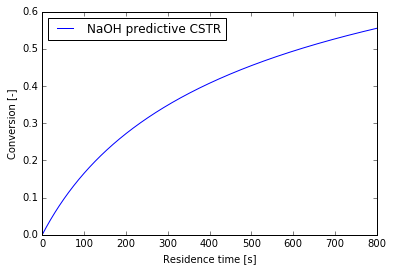

In [17]:
V_CSTR = 0.3                                             #L
Ceac_given, Cnaoh_given = 0.08, 0.04                     #mol/L

#Experimental Values to be inserted from run
Q_CSTR_exp = numpy.array([24, 40, 60, 75]) / 60 / 1000   #L/s
Conversion_exp = numpy.array([0.94, 0.9, 0.88, 0.85])

Q_components = Q_CSTR_exp/2

τ_CSTR = numpy.linspace(0, 800, 1000)

Ceac  = (Ceac_given * Q_components / Q_CSTR_exp)[0]
Cnaoh = (Cnaoh_given * Q_components / Q_CSTR_exp)[0]
Cnaac = 0
Ceth = 0

Ca = numpy.array([0.0]*len(τ_CSTR))
Cb = numpy.array([0.0]*len(τ_CSTR))
ConversionA = numpy.array([0.0]*len(τ_CSTR))
ConversionB = numpy.array([0.0]*len(τ_CSTR))

#Kinetics parameters: must be changed to suit experimental values
k = 0.054
n = 1
m = 1

def rate(C):
    Ca, Cb, Cc, Cd = C
    #Since NaOH is the limiting reagent
    rnaoh = -k * (Ca)**n * (Cb)**m
    reac = rnaoh 
    rnaac = -rnaoh
    ret = -rnaoh
    return(reac, rnaoh, rnaac, ret)

def CSTR(C):
    Ca, Cb, Cc, Cd = C
    ra, rb, rc, rd = rate(C)
    #Ethyl Acetate
    balanceEac = Ca - Ceac - ra * tau
    #NaOH
    balanceNaOH = Cb - Cnaoh - rb * tau
    #Sodium Acetate
    balanceNaAc = Cc - Cnaac - rc * tau
    #Ethanol
    balanceEt = Cd - Ceth - rd * tau
    return(balanceEac, balanceNaOH, balanceNaAc, balanceEt)

for i in range(0, len(τ_CSTR)):
    tau = τ_CSTR[i]
    C = fsolve(CSTR, [Ceac/3, Cnaoh/3, 0, 0])
    Ca[i], Cb[i] = C[0], C[1]
    

ConversionA = (Ceac - Ca) / Ceac
ConversionB = (Cnaoh - Cb) / Cnaoh

#Plotting of curves
plt.figure("Continuous Runs 1")
#plt.plot(V_CSTR/Q_CSTR_exp, Conversion_exp, 'o', label = "NaOH experimental CSTR")
plt.plot(τ_CSTR, ConversionB, label = "NaOH predictive CSTR")
plt.xlabel("Residence time [s]")
plt.ylabel("Conversion [-]")
plt.legend(loc = "best")

# Experimental

In [18]:
k_start = 6.67
k_start_batch = 6.5
k_final = 3.85

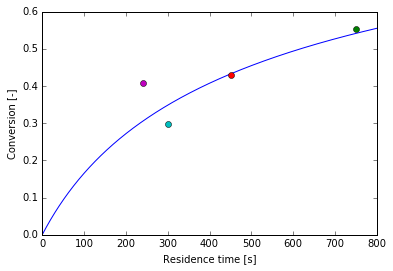

In [19]:
k_24 = 5.11 
k_40 = 5.46
k_60 = 5.83
k_75 = 5.52

x_24 = ((k_start - k_24)/(k_start - k_final))
x_40 = ((k_start - k_40)/(k_start - k_final))
x_60 = ((k_start - k_60)/(k_start - k_final))
x_75 = ((k_start - k_75)/(k_start - k_final))

Cnaoh_24 = 0.02*(1 - x_24)
Cnaoh_40 = 0.02*(1 - x_40)
Cnaoh_60 = 0.02*(1 - x_60)
Cnaoh_75 = 0.02*(1 - x_75)

#Plotting of curves
plt.figure(6)
#plt.plot(V_CSTR/Q_CSTR_exp, Conversion_exp, 'o', label = "NaOH experimental CSTR")
plt.plot(τ_CSTR, ConversionB, label = "NaOH predictive CSTR")
plt.plot(750, x_24, label = "Q = 24 L/min", marker = 'o')
plt.plot(450, x_40, label = "Q = 40 L/min", marker = 'o')
plt.plot(300, x_60, label = "Q = 60 L/min", marker = 'o')
plt.plot(240, x_75, label = "Q = 75 L/min", marker = 'o')
plt.xlabel("Residence time [s]")
plt.ylabel("Conversion [-]")
plt.show()

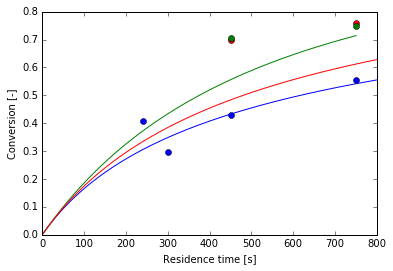

In [20]:
k_24 = 5.11 
k_40 = 5.46
k_60 = 5.83
k_75 = 5.52

x_24 = ((k_start - k_24)/(k_start - k_final))
x_40 = ((k_start - k_40)/(k_start - k_final))
x_60 = ((k_start - k_60)/(k_start - k_final))
x_75 = ((k_start - k_75)/(k_start - k_final))

Cnaoh_24 = 0.02*(1 - x_24)
Cnaoh_40 = 0.02*(1 - x_40)
Cnaoh_60 = 0.02*(1 - x_60)
Cnaoh_75 = 0.02*(1 - x_75)

#Plotting of curves
plt.figure(1)
#plt.plot(V_CSTR/Q_CSTR_exp, Conversion_exp, 'o', label = "NaOH experimental CSTR")
plt.plot(τ_CSTR, ConversionB, label = "NaOH predictive CSTR")
plt.plot(750, x_24, label = "Q = 24 L/min", marker = 'o', color = 'b')
plt.plot(450, x_40, label = "Q = 40 L/min", marker = 'o', color = 'b')
plt.plot(300, x_60, label = "Q = 60 L/min", marker = 'o', color = 'b')
plt.plot(240, x_75, label = "Q = 75 L/min", marker = 'o', color = 'b')
plt.xlabel("Residence time [s]")
plt.ylabel("Conversion [-]")
#plt.legend(loc = "best")

V_PFR = 0.3                                     #L

Q_PFR_exp = numpy.array([24]) / 60 / 1000       #L/s
conv_exp_PFR = numpy.array([0.5,0.7])

Q_components = Q_PFR_exp/2

V_PFR_span = numpy.linspace(0, V_PFR, 1000) 

Ceac  = (Ceac_given * Q_components / Q_PFR_exp)[0]
Cnaoh = (Cnaoh_given * Q_components / Q_PFR_exp)[0]

def PFR(C, V):
    Ca, Cb, Cc, Cd = C
    ra, rb, rc, rd = rate(C)
    
    dCadV = ra/Q
    dCbdV = rb/Q
    dCcdV = rc/Q
    dCddV = rd/Q
    
    return(dCadV, dCbdV, dCcdV, dCddV)

#plt.figure("Continuous Runs")

#Plotting of experimental data
#plt.plot(V_PFR/Q_PFR_exp, conv_exp_PFR, 'o',label = "NaOH experimental PFR")

for i in range(0, len(Q_PFR_exp)):
    Q = Q_PFR_exp[i]
    
    C = odeint(PFR, [Ceac, Cnaoh, 0, 0], V_PFR_span)
    Ca, Cb, Cc, Cd = C[:,0], C[:,1], C[:,2], C[:,3]
    
    ConversionA = (Ceac - Ca) / Ceac
    ConversionB = (Cnaoh - Cb) / Cnaoh
    
    #Plotting of predictive data for different values of Q
    plt.plot(V_PFR_span/Q, ConversionB, label = "NaOH predictive (Q = " + str(Q) +") PFR")

k_pfr_24 = 4.53
k_pfr_40 = 4.7
x_pfr_24= (k_start - k_pfr_24)/(k_start - k_final)
x_pfr_40= (k_start - k_pfr_40)/(k_start - k_final)
Cnaoh = 0.02*(1 - x_pfr_24)
Cnaoh = 0.02*(1 - x_pfr_40)

plt.plot(750, x_pfr_24, label = "Q = 24 L/min", marker= 'o', color = 'r')
plt.plot(450, x_pfr_40, label = "Q = 40 L/min", marker= 'o', color = 'r')
#plt.xlabel("Residence Time [s]")
#plt.ylabel("Conversion [-]")
#plt.legend(loc = 'best')


#Volume is halved
V_CSTR_series = 0.15                                            #L
Ceac_given, Cnaoh_given = 0.08, 0.04                     #mol/L

#Experimental Values to be inserted from run
Q_CSTR_exp = numpy.array([24, 40]) / 60 / 1000   #L/s
Conversion_exp = numpy.array([0.94, 0.9])

Q_components = Q_CSTR_exp/2

τ_CSTR_series = numpy.linspace(0, 800, 10000)

Ceac  = (Ceac_given * Q_components / Q_CSTR_exp)[0]
Cnaoh = (Cnaoh_given * Q_components / Q_CSTR_exp)[0]
Cnaac = 0
Ceth = 0

Ca1 = numpy.array([0.0]*len(τ_CSTR_series))
Cb1 = numpy.array([0.0]*len(τ_CSTR_series))
Ca2 = numpy.array([0.0]*len(τ_CSTR_series))
Cb2 = numpy.array([0.0]*len(τ_CSTR_series))

ConversionA = numpy.array([0.0]*len(τ_CSTR_series))
ConversionB = numpy.array([0.0]*len(τ_CSTR_series))

def CSTR_series(C):
    #Since volume is halved, the residance time is halved (τ = V/Q)
    #so for the same Q as the other continuous runs the τ is halved
    Ca, Cb, Cc, Cd = C
    ra, rb, rc, rd = rate(C)
    #Ethyl Acetate
    balanceEac = Ca - Ceac - ra * (tau/2)
    #NaOH
    balanceNaOH = Cb - Cnaoh - rb * (tau/2)
    #Sodium Acetate
    balanceNaAc = Cc - Cnaac - rc * (tau/2)
    #Ethanol
    balanceEt = Cd - Ceth - rd * (tau/2)
    
    return(balanceEac, balanceNaOH, balanceNaAc, balanceEt)

#First CSTR with inlet concentrations
for i in range(0, len(τ_CSTR_series)):
    tau = τ_CSTR_series[i]
    C1 = fsolve(CSTR_series, [Ceac/3, Cnaoh/3, 0, 0])
    Ca1[i], Cb1[i] = C1[0], C1[1]
    
#Second CSTR outlet of first is inlet of second
for i in range(0, len(τ_CSTR_series)):
    tau = τ_CSTR_series[i]
    Ceac, Cnaoh = Ca1[i], Cb1[i]
    C2 = fsolve(CSTR_series, [Ceac/3, Cnaoh/3, 0, 0])
    Ca2[i], Cb2[i] = C2[0], C2[1]

Ceac  = (Ceac_given * Q_components / Q_CSTR_exp)[0]
Cnaoh = (Cnaoh_given * Q_components / Q_CSTR_exp)[0]

ConversionA = (Ceac - Ca2) / Ceac
ConversionB = (Cnaoh - Cb2) / Cnaoh

#plt.figure("Continouos Runs")
#Plotting of curves
#plt.plot(V_CSTR_series*2/Q_CSTR_exp, Conversion_exp, 'o', label = "NaOH experimental Series CSTR")
plt.plot(τ_CSTR_series, ConversionB, label = "NaOH predictive Series CSTR")

k_cstr_s_24 = 4.56
k_cstr_s_40 = 4.68

x_cstr_s_24= (k_start - k_cstr_s_24)/(k_start - k_final)
x_cstr_s_40= (k_start - k_cstr_s_40)/(k_start - k_final)
Cnaoh = 0.02*(1 - x_cstr_s_24)
Cnaoh = 0.02*(1 - x_cstr_s_40)

plt.plot(750, x_cstr_s_24, label = 'Q = 24 L/min', marker = 'o', color = 'g')
plt.plot(450, x_cstr_s_40, label = 'Q = 40 L/min', marker = 'o', color = 'g')
plt.show()

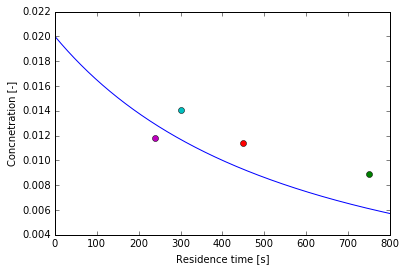

In [21]:
plt.figure("Continuous Runs")
#plt.plot(V_CSTR/Q_CSTR_exp, Conversion_exp, 'o', label = "NaOH experimental CSTR")
plt.plot(τ_CSTR, Cb, label = "NaOH predictive CSTR")
plt.plot(750, Cnaoh_24, label = "Q = 24 L/min", marker = 'o')
plt.plot(450, Cnaoh_40, label = "Q = 40 L/min", marker = 'o')
plt.plot(300, Cnaoh_60, label = "Q = 60 L/min", marker = 'o')
plt.plot(240, Cnaoh_75, label = "Q = 75 L/min", marker = 'o')
plt.xlabel("Residence time [s]")
plt.ylabel("Concnetration [-]")
#plt.legend(loc = "best")
plt.show()

### Part 2 
Test the ambient kinetics using:
* A batch reactor.  You will obtain a concentration profile
* The PFR using a **total** inlet flow rate (both streams combined) of 24 and 40 ml/min
* 2 CSTR's (150ml each) in series using a **total** inlet flow rate (both streams combined) of 24 and 40 ml/min.  Measure the concentration in both reactors once steady state is achieved.

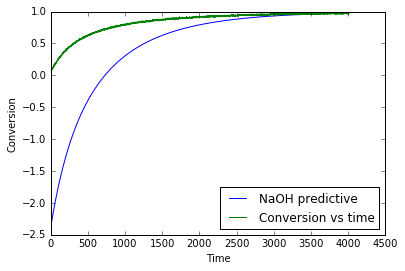

In [22]:
V_BR = 0.2 #L
Ceac_b = Ceac_given * (V_BR/2) / V_BR
Cnaoh_b = Cnaoh_given * (V_BR/2) / V_BR

time_exp = numpy.array([])
conv_exp_batch = numpy.array([])

C0 = [Ceac_b, Cnaoh_b, 0, 0]

time = numpy.linspace(0, 4008, 4200)

def BR(C, t):
    Ca, Cb, Cc, Cd = C
    ra, rb, rc, rd = rate(C)
    
    dCadt = ra
    dCbdt = rb
    dCcdt = rc
    dCddt = rd
    
    return(dCadt, dCbdt, dCcdt, dCddt)

C = odeint(BR, C0, time)
#Ethyl acetate, Sodium hydroxide, sodium acetate, ethanol
Ca, Cb, Cc, Cd = C[:,0], C[:,1], C[:,2], C[:,3]

ConversionA = (Ceac - Ca) / Ceac
ConversionB = (Cnaoh - Cb) / Cnaoh

#Plotting of batch runs and prediction
plt.figure("Batch")
#plt.plot(time_exp, conv_exp_batch, 'o', label = "NaOH experimental")
plt.plot(time, ConversionB, label = "NaOH predictive")
plt.xlabel("Time [s]")
plt.ylabel("Conversion [-]")
plt.legend(loc = 'best')
experimental = pandas.read_excel(open('clb kinetics raw data.xlsx','rb'))
time1 = (experimental['time'])
batch = (experimental['batch'])

k_start = 6.67
k_start_batch = 6.5
k_final = 3.85

x_list = []
cnaoh_list = []

for i in range(len(batch)):
    x = (k_start - batch[i])/(k_start - k_final)
    x_list.append(x)

for j in range(len(x_list)):
    Cnaoh = 0.02*(1 - x_list[j])
    cnaoh_list.append(Cnaoh)
    
plt.plot(time1, x_list, label = "Conversion vs time")
plt.ylabel("Conversion")
plt.xlabel("Time")
plt.legend(loc= 'best')
plt.show()


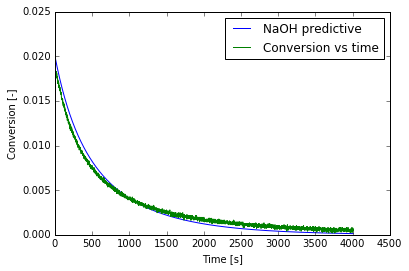

In [17]:
plt.plot(time, Cb, label = "NaOH predictive")
plt.plot(time1, cnaoh_list, label = "Conversion vs time")
plt.xlabel("Time [s]")
plt.ylabel("Conversion [-]")
plt.legend(loc = 'best')
plt.show()


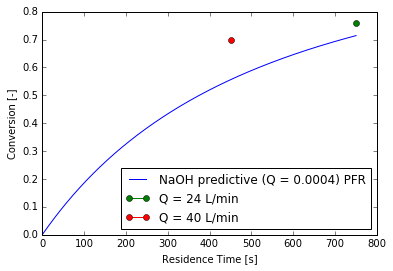

In [9]:
V_PFR = 0.3                                     #L

Q_PFR_exp = numpy.array([24]) / 60 / 1000       #L/s
conv_exp_PFR = numpy.array([0.5,0.7])

Q_components = Q_PFR_exp/2

V_PFR_span = numpy.linspace(0, V_PFR, 1000) 

Ceac  = (Ceac_given * Q_components / Q_PFR_exp)[0]
Cnaoh = (Cnaoh_given * Q_components / Q_PFR_exp)[0]

def PFR(C, V):
    Ca, Cb, Cc, Cd = C
    ra, rb, rc, rd = rate(C)
    
    dCadV = ra/Q
    dCbdV = rb/Q
    dCcdV = rc/Q
    dCddV = rd/Q
    
    return(dCadV, dCbdV, dCcdV, dCddV)

plt.figure("Continuous Runs3")

#Plotting of experimental data
#plt.plot(V_PFR/Q_PFR_exp, conv_exp_PFR, 'o',label = "NaOH experimental PFR")

for i in range(0, len(Q_PFR_exp)):
    Q = Q_PFR_exp[i]
    
    C = odeint(PFR, [Ceac, Cnaoh, 0, 0], V_PFR_span)
    Ca, Cb, Cc, Cd = C[:,0], C[:,1], C[:,2], C[:,3]
    
    ConversionA = (Ceac - Ca) / Ceac
    ConversionB = (Cnaoh - Cb) / Cnaoh
    
    #Plotting of predictive data for different values of Q
    plt.plot(V_PFR_span/Q, ConversionB, label = "NaOH predictive (Q = " + str(Q) +") PFR")

k_pfr_24 = 4.53
k_pfr_40 = 4.7
x_pfr_24= (k_start - k_pfr_24)/(k_start - k_final)
x_pfr_40= (k_start - k_pfr_40)/(k_start - k_final)
Cnaoh = 0.02*(1 - x_pfr_24)
Cnaoh = 0.02*(1 - x_pfr_40)

plt.plot(750, x_pfr_24, label = "Q = 24 L/min", marker= 'o')
plt.plot(450, x_pfr_40, label = "Q = 40 L/min", marker= 'o')
plt.xlabel("Residence Time [s]")
plt.ylabel("Conversion [-]")
plt.legend(loc = 'best')
plt.show()    

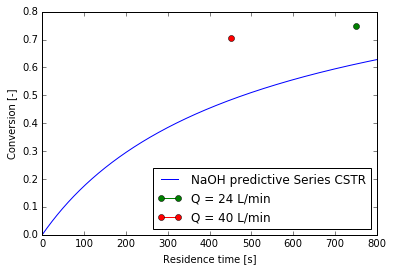

In [10]:
#Volume is halved
V_CSTR_series = 0.15                                            #L
Ceac_given, Cnaoh_given = 0.08, 0.04                     #mol/L

#Experimental Values to be inserted from run
Q_CSTR_exp = numpy.array([24, 40]) / 60 / 1000   #L/s
Conversion_exp = numpy.array([0.94, 0.9])

Q_components = Q_CSTR_exp/2

τ_CSTR_series = numpy.linspace(0, 800, 10000)

Ceac  = (Ceac_given * Q_components / Q_CSTR_exp)[0]
Cnaoh = (Cnaoh_given * Q_components / Q_CSTR_exp)[0]
Cnaac = 0
Ceth = 0

Ca1 = numpy.array([0.0]*len(τ_CSTR_series))
Cb1 = numpy.array([0.0]*len(τ_CSTR_series))
Ca2 = numpy.array([0.0]*len(τ_CSTR_series))
Cb2 = numpy.array([0.0]*len(τ_CSTR_series))

ConversionA = numpy.array([0.0]*len(τ_CSTR_series))
ConversionB = numpy.array([0.0]*len(τ_CSTR_series))

def CSTR_series(C):
    #Since volume is halved, the residance time is halved (τ = V/Q)
    #so for the same Q as the other continuous runs the τ is halved
    Ca, Cb, Cc, Cd = C
    ra, rb, rc, rd = rate(C)
    #Ethyl Acetate
    balanceEac = Ca - Ceac - ra * (tau/2)
    #NaOH
    balanceNaOH = Cb - Cnaoh - rb * (tau/2)
    #Sodium Acetate
    balanceNaAc = Cc - Cnaac - rc * (tau/2)
    #Ethanol
    balanceEt = Cd - Ceth - rd * (tau/2)
    
    return(balanceEac, balanceNaOH, balanceNaAc, balanceEt)

#First CSTR with inlet concentrations
for i in range(0, len(τ_CSTR_series)):
    tau = τ_CSTR_series[i]
    C1 = fsolve(CSTR_series, [Ceac/3, Cnaoh/3, 0, 0])
    Ca1[i], Cb1[i] = C1[0], C1[1]
    
#Second CSTR outlet of first is inlet of second
for i in range(0, len(τ_CSTR_series)):
    tau = τ_CSTR_series[i]
    Ceac, Cnaoh = Ca1[i], Cb1[i]
    C2 = fsolve(CSTR_series, [Ceac/3, Cnaoh/3, 0, 0])
    Ca2[i], Cb2[i] = C2[0], C2[1]

Ceac  = (Ceac_given * Q_components / Q_CSTR_exp)[0]
Cnaoh = (Cnaoh_given * Q_components / Q_CSTR_exp)[0]

ConversionA = (Ceac - Ca2) / Ceac
ConversionB = (Cnaoh - Cb2) / Cnaoh

plt.figure("Continouos Runs4")
#Plotting of curves
#plt.plot(V_CSTR_series*2/Q_CSTR_exp, Conversion_exp, 'o', label = "NaOH experimental Series CSTR")
plt.plot(τ_CSTR_series, ConversionB, label = "NaOH predictive Series CSTR")

k_cstr_s_24 = 4.56
k_cstr_s_40 = 4.68

x_cstr_s_24= (k_start - k_cstr_s_24)/(k_start - k_final)
x_cstr_s_40= (k_start - k_cstr_s_40)/(k_start - k_final)
Cnaoh = 0.02*(1 - x_cstr_s_24)
Cnaoh = 0.02*(1 - x_cstr_s_40)

plt.plot(750, x_cstr_s_24, label = 'Q = 24 L/min', marker = 'o')
plt.plot(450, x_cstr_s_40, label = 'Q = 40 L/min', marker = 'o')
plt.xlabel("Residence time [s]")
plt.ylabel("Conversion [-]")
plt.legend(loc = "best")
plt.show()